In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

In [88]:
# Load Dataset 
try:
    df = pd.read_csv("food data.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: The file 'food data.csv' was not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

df.head()

Dataset loaded successfully!


,Date,Category,Subcategory,Variable,Value
0,2019-10-06,Alcohol,Other,Dollars,1.150829e+09
1,2019-10-06,All foods,All foods,Dollars,1.304327e+10
2,2019-10-06,Beverages,Carbonated non-alcoholic,Dollars,7.350713e+08
3,2019-10-06,Beverages,Fruit drinks and non-carbonated sugary,Dollars,7.290711e+08
4,2019-10-06,Beverages,Other,Dollars,2.271993e+08


In [89]:
df

,Date,Category,Subcategory,Variable,Value
0,2019-10-06,Alcohol,Other,Dollars,1.150829e+09
1,2019-10-06,All foods,All foods,Dollars,1.304327e+10
2,2019-10-06,Beverages,Carbonated non-alcoholic,Dollars,7.350713e+08
3,2019-10-06,Beverages,Fruit drinks and non-carbonated sugary,Dollars,7.290711e+08
4,2019-10-06,Beverages,Other,Dollars,2.271993e+08
...,...,...,...,...,...
152275,2023-05-07,Vegetables,Other-mostly water fresh/frozen,Percent change share 3 years,-1.410000e+01
152276,2023-05-07,Vegetables,Other-nutrient-dense canned,Percent change share 3 years,-1.260000e+01
152277,2023-05-07,Vegetables,Other-nutrient-dense fresh/frozen,Percent change share 3 years,-1.640000e+01
152278,2023-05-07,Vegetables,Starchy canned,Percent change share 3 years,-1.310000e+01


In [90]:
if df is not None:
    print("Dataset Overview:")
    print(df.head())
    print(df.info())
    
    # Convert to datetime format
    try:
        df['Date'] = pd.to_datetime(df['Date'])
        print("Date column successfully converted to datetime!")
    except Exception as e:
        print(f"Error converting Date column: {e}")
    
    # Handle missing values
    df['Value'] = df['Value'].fillna(df['Value'].median())
    
    # Aggregate sales by Category and Date
    sales_trends = df.groupby(['Date', 'Category'])['Value'].sum().reset_index()
    
    # Scale the sales values
    scaler = MinMaxScaler()
    sales_trends['Value'] = scaler.fit_transform(sales_trends[['Value']])

Dataset Overview:
         Date   Category                             Subcategory Variable  \
0  2019-10-06    Alcohol                                   Other  Dollars   
1  2019-10-06  All foods                               All foods  Dollars   
2  2019-10-06  Beverages                Carbonated non-alcoholic  Dollars   
3  2019-10-06  Beverages  Fruit drinks and non-carbonated sugary  Dollars   
4  2019-10-06  Beverages                                   Other  Dollars   

          Value  
0  1.150829e+09  
1  1.304327e+10  
2  7.350713e+08  
3  7.290711e+08  
4  2.271993e+08  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152280 entries, 0 to 152279
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         152280 non-null  object 
 1   Category     152280 non-null  object 
 2   Subcategory  152280 non-null  object 
 3   Variable     152280 non-null  object 
 4   Value        118584 non-null  float64


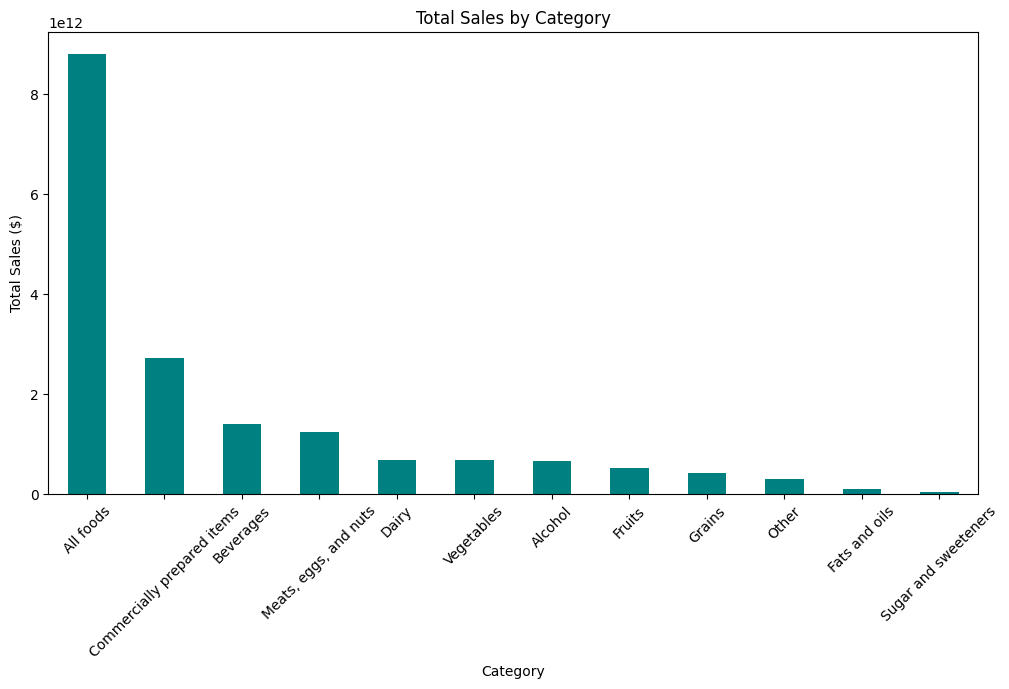

Category-wise Total Sales:
Category
All foods                      8.794435e+12
Commercially prepared items    2.725341e+12
Beverages                      1.395390e+12
Meats, eggs, and nuts          1.251993e+12
Dairy                          6.940494e+11
Vegetables                     6.831437e+11
Alcohol                        6.552531e+11
Fruits                         5.320618e+11
Grains                         4.190111e+11
Other                          2.951403e+11
Fats and oils                  1.038716e+11
Sugar and sweeteners           3.918171e+10
Name: Value, dtype: float64


In [91]:
try:
    # Compute moving averages for trend analysis
    df['7-day MA'] = df.groupby('Category')['Value'].transform(lambda x: x.rolling(7, min_periods=1).mean())
    df['30-day MA'] = df.groupby('Category')['Value'].transform(lambda x: x.rolling(30, min_periods=1).mean())
        
    # Compute category-wise total sales
    category_sales = df.groupby('Category')['Value'].sum().sort_values(ascending=False)
        
    # Plot Category-wise Sales
    plt.figure(figsize=(12, 6))
    category_sales.plot(kind='bar', color='teal')
    plt.title("Total Sales by Category")
    plt.xlabel("Category")
    plt.ylabel("Total Sales ($)")
    plt.xticks(rotation=45)
    plt.show()
        
    print("Category-wise Total Sales:")
    print(category_sales)
        
except Exception as e:
    print(f"Error in additional metrics analysis: {e}")


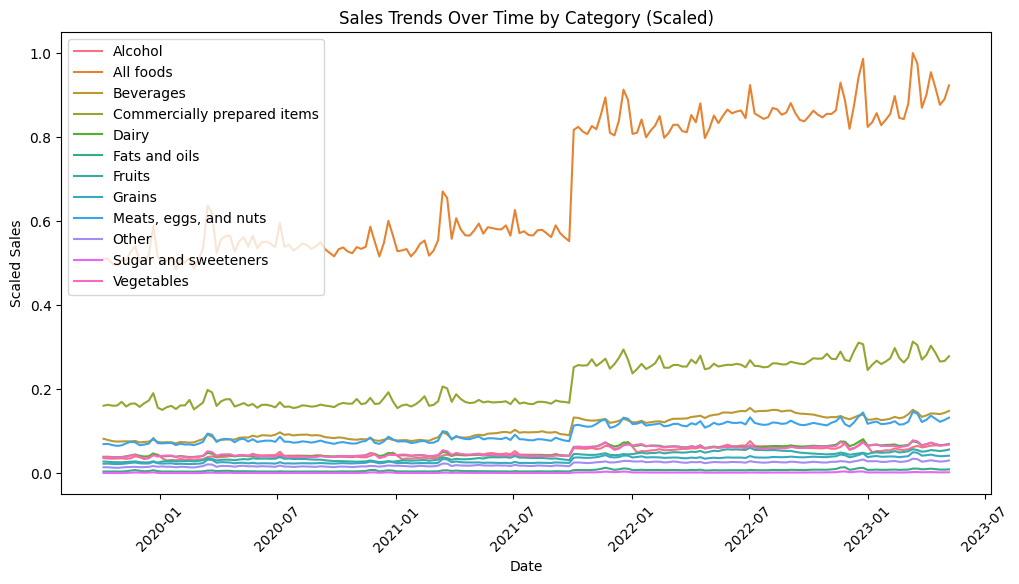

In [92]:
# Plot sales trends over time (Including All Categories)
try:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Value', hue='Category', data=sales_trends)
    plt.title("Sales Trends Over Time by Category (Scaled)")
    plt.xlabel("Date")
    plt.ylabel("Scaled Sales")
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.show()
except Exception as e:
    print(f"Error generating sales trends plot: {e}")

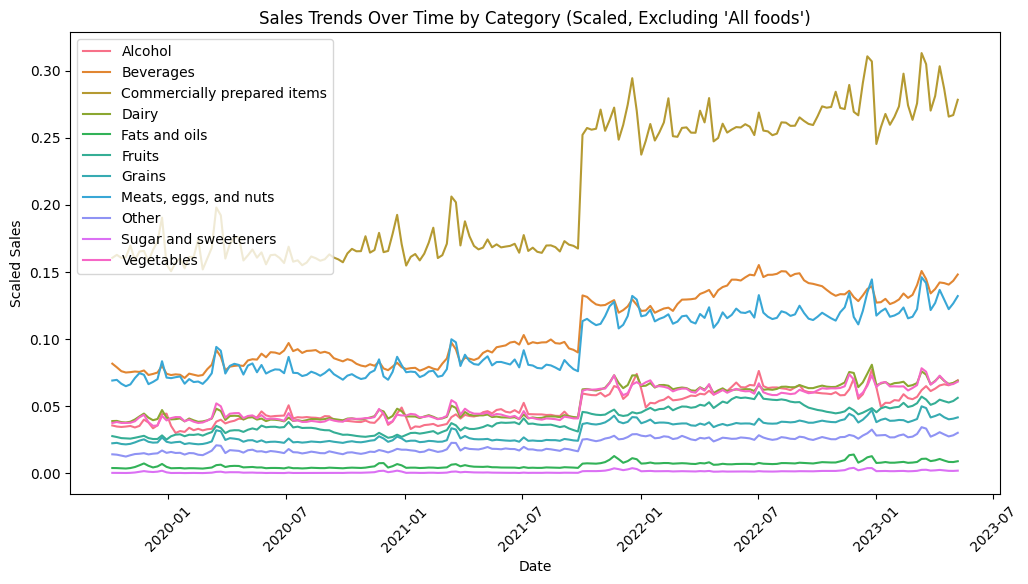

In [93]:
# Observing category-wise trends without 'All Foods'
try:
    sales_trends_filtered = sales_trends[sales_trends['Category'] != 'All foods']
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Value', hue='Category', data=sales_trends_filtered)
    plt.title("Sales Trends Over Time by Category (Scaled, Excluding 'All foods')")
    plt.xlabel("Date")
    plt.ylabel("Scaled Sales")
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.show()
except Exception as e:
    print(f"Error generating filtered sales trends plot: {e}")

Date column successfully converted to datetime!


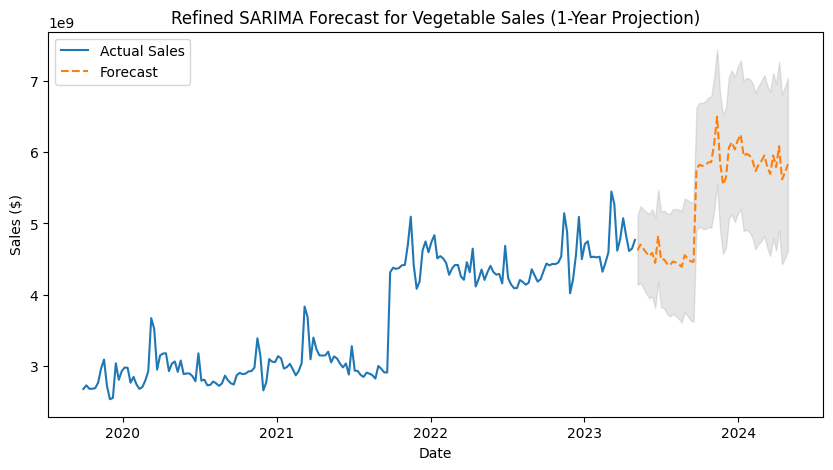

In [94]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")
if df is not None:
    # Convert 'Date' to datetime format
    try:
        df['Date'] = pd.to_datetime(df['Date'])
        print("Date column successfully converted to datetime!")
    except Exception as e:
        print(f"Error converting Date column: {e}")
    
    # Handle missing values
    df['Value'] = df['Value'].fillna(df['Value'].median())
    
    # Aggregate sales by Category and Date
    sales_trends = df.groupby(['Date', 'Category'])['Value'].sum().reset_index()
    
    # Scale the sales values
    scaler = MinMaxScaler()
    sales_trends['Value'] = scaler.fit_transform(sales_trends[['Value']])
    
    # Observing SARIMA Forecast with Seasonal Adjustments
    try:
        produce_sales = df[df['Category'] == 'Vegetables'].groupby('Date')['Value'].sum()
        produce_sales.index = pd.DatetimeIndex(produce_sales.index).to_period('W')
        
        # Ensure we have sufficient observations for seasonal modeling
        if len(produce_sales) < 104:  # Minimum 2 years of weekly data recommended
            raise ValueError("Too few observations to estimate seasonal ARMA parameters. Consider a simpler model or more data.")
        
        # Adjust SARIMA parameters to stabilize the forecast
        model = SARIMAX(produce_sales, order=(2,1,2), seasonal_order=(1,1,1,52), enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=False)
        
        forecast = model_fit.get_forecast(steps=52)
        forecast_index = pd.date_range(start=produce_sales.index[-1].to_timestamp(), periods=52, freq='W')
        forecast_mean = forecast.predicted_mean
        forecast_ci = forecast.conf_int()
        
        plt.figure(figsize=(10, 5))
        plt.plot(produce_sales.index.to_timestamp(), produce_sales, label="Actual Sales")
        plt.plot(forecast_index, forecast_mean, label="Forecast", linestyle='dashed')
        plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2)
        plt.title("Refined SARIMA Forecast for Vegetable Sales (1-Year Projection)")
        plt.xlabel("Date")
        plt.ylabel("Sales ($)")
        plt.legend()
        plt.show()
    except ValueError as ve:
        print(f"Data issue in SARIMA model: {ve}")
    except Exception as e:
        print(f"Error in SARIMA model: {e}")
